<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.
### Input Layer:
The layers that receives all the input features.
### Hidden Layer:
They are called hidden because they are not accessed and are interfaced through the input.
### Output Layer:
The layer in neural network that outputs a vector of values that is in a format that is suitable for the type of problem.
### Neuron:
Neural networks are made of layers made up of neurons or nodes that receive inputs and pass on their signal to the next layer of nodes if a threshold is reached.
### Weight:
In coordination with the bias value, the weight gives the network the full range of motion that it needs to find the best way to explain the patterns in the data.
### Activation Function:
It states if node should "fire" and decide how much signal to pass onto the next layer
### Node Map:
a visual diagram of the architecture of the neural network
### Perceptron:
is a single node of a neural network with nothing else

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Answer Here
The information starts through the input layers of nodes.
Typically node maps are drawn with one node matching each of the different inputs,features, or columns of the dataset.
Each node layer affects the next layer by applying weights and bias then using each nodes activation function.
We can search for optimal weights and biases through gradient descent and measuring error.
Information is finally passed on to the output layer, where it outputs a vector of values that fit the format type suitable to the problem trying to solve.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [3]:
import numpy as np
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [20]:
df.shape

(4, 3)

In [8]:
# lecture
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)


In [47]:
(df.values.tolist())

[[0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 0]]

In [49]:
correct_outputs = [[1], [1], [1],[0]]

In [21]:
weights = np.random.random((3,1))
weights.shape

(3, 1)

In [14]:
weighted_sum = np.dot(df, weights)
weighted_sum

array([[0.94601402],
       [1.2909825 ],
       [1.27191051],
       [0.67086497]])

In [15]:
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.72031286],
       [0.78431344],
       [0.78106962],
       [0.66169681]])

In [50]:
error = correct_outputs - activated_output
error

array([[ 0.27968714],
       [ 0.21568656],
       [ 0.21893038],
       [-0.66169681]])

In [51]:
adjustments = error * sigmoid_derivative(weighted_sum)

In [53]:
weights += np.dot(df.T, adjustments)
weights

array([[0.34183986],
       [0.43208166],
       [0.91531747]])

In [55]:
# Update our weights 10,000 times - (fingers crossed that this process reduces error)
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(df, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # Update the Weights
    weights += np.dot(df.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-2.4104827 ]
 [-2.41005191]
 [ 7.49033756]]
Output after training
[[0.99944181]
 [0.99381734]
 [0.99381998]
 [0.0079984 ]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [4]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [44]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
import matplotlib.pyplot as plt

feats = list(diabetes)[:-1]
mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(diabetes[feats].values)
y = diabetes['Outcome'].values

In [50]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self,rate = 0.01, niter = 10):
        self.niter = niter
        self.rate = rate
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(x)
        return sx * (1-sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weight = np.zeros(1 + X.shape[1])
        
        self.errors = []

        for i in range(self.niter):
            err = 0
            # loop through matched target using zip function
            for xi, target in zip(X,y):
                # error weighted sum of inputs using the predict function
                delta_w = self.rate * (target - self.predict(xi))
                # adjust weights
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
            
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.5, 1, 0)

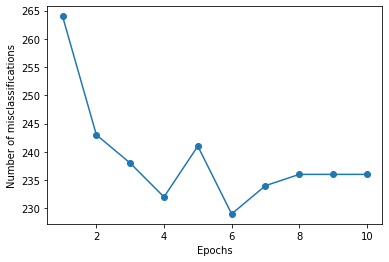

In [51]:
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?